# XGBoost on Credit Card Default predictions in R

XGBoost is short for “Extreme Gradient Boosting”, where the term “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost is an optimized distributed gradient boosting system designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting(also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment(Hadoop, SGE, MPI) and can solve problems beyond billions of examples. Read more on it at : http://xgboost.readthedocs.io/en/latest/model.html

This notebook covers the analysis of the credit card default data in R using XGBoost, to make predictions of default of customers and data is available from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

Begin by loading the libraries and the dataset

In [1]:
# Load the libraries
library(readxl)
library(ggplot2)
library(caTools)

In [2]:
# Read the dataset into the variable credit
credit <- read_excel("default_of_credit_card_clients.xls")

In [3]:
head(credit,10)
dim(credit)

NA,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1.000000,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,⋯,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,120000.000000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,⋯,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1.000000
3.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,⋯,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0.000000
4.000000,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,⋯,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0.000000
5.000000,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,⋯,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0.000000
6.000000,50000.000000,1.000000,1.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,⋯,19394.000000,19619.000000,20024.000000,2500.000000,1815.000000,657.000000,1000.000000,1000.000000,800.000000,0.000000
7.000000,500000.000000,1.000000,1.000000,2.000000,29.000000,0.000000,0.000000,0.000000,0.000000,⋯,542653.000000,483003.000000,473944.000000,55000.000000,40000.000000,38000.000000,20239.000000,13750.000000,13770.000000,0.000000
8.000000,100000.000000,2.000000,2.000000,2.000000,23.000000,0.000000,-1.000000,-1.000000,0.000000,⋯,221.000000,-159.000000,567.000000,380.000000,601.000000,0.000000,581.000000,1687.000000,1542.000000,0.000000
9.000000,140000.000000,2.000000,3.000000,1.000000,28.000000,0.000000,0.000000,2.000000,0.000000,⋯,12211.000000,11793.000000,3719.000000,3329.000000,0.000000,432.000000,1000.000000,1000.000000,1000.000000,0.000000


[1] 30001    25

## Data Preprocessing

Observe that the dataset has 30001 observations with 25 attributes or features, the first row is the column names.

In [4]:
sum(is.na(credit))

[1] 0

In [5]:
summary(credit)

      NA                 X1                 X2                 X3           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      X4                 X5                 X6                 X7           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      X8                 X9                X10                X11           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     X12                X13                X14                X15           

There are no NA's present. The variables need to be converted into numeric for our anlalysis.

In [6]:
colnames(credit) <- credit[1,]
credit <- credit[-1,]
head(credit)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1.000000,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,⋯,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2.000000,120000.000000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,⋯,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1.000000
3.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,⋯,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0.000000
4.000000,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,⋯,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0.000000
5.000000,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,⋯,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0.000000
6.000000,50000.000000,1.000000,1.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,⋯,19394.000000,19619.000000,20024.000000,2500.000000,1815.000000,657.000000,1000.000000,1000.000000,800.000000,0.000000


In [7]:
credit <- sapply(credit, as.numeric)
summary(credit)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

Now lets plot a correlogram illustrating the correlations between the attributes.

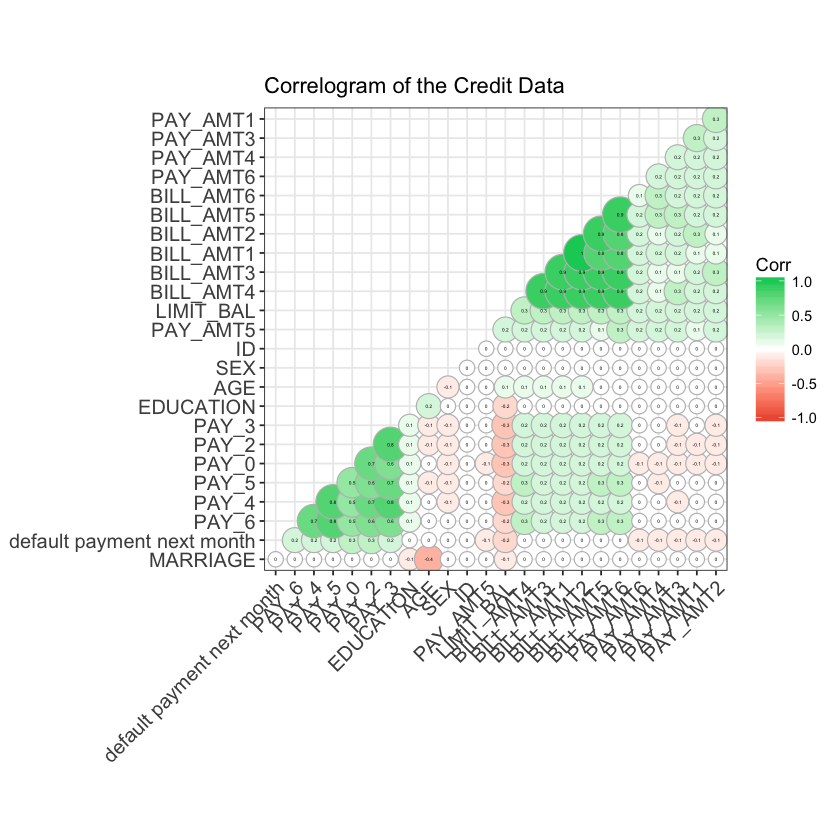

In [8]:
#install.packages("ggcorrplot")
library(ggcorrplot)
# Correlation matrix
corr <- round(cor(credit), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 1, 
           method="circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of the Credit Data", 
           ggtheme=theme_bw)

From above, observe that the attributes such as SEX, EDUCATION, MARRIAGE and AGE have negilgible correlations among themselves and with the target variable. So they can be dropped from the model

In [9]:
creditm <- credit[,c(-1,-3,-4,-5,-6)]
dim(creditm)
head(creditm)

[1] 30000    20

LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
50000,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0


## Feature Scaling

The variables have values spread over a wider range.Lets scale it now. Target variable can be set apart, need not be scaled.

In [10]:
creditm <- scale(creditm[,-20])

In [11]:
default = credit[,25]
creditdata <- data.frame(creditm, default)
head(creditdata)
dim(creditdata)

LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
-1.1367012,1.79453395,1.7823185,-0.6966518,-0.6665876,-1.5300205,-1.4860160,-0.64249036,-0.64738844,-0.66798218,-0.6724861,-0.6630475,-0.6527133,-0.3419359,-0.2270819,-0.2967963,-0.3080574,-0.3141309,-0.29337717,1
-0.3659744,-0.87497656,1.7823185,0.1388625,0.1887429,0.2349126,1.9922823,-0.65920776,-0.66673546,-0.63924364,-0.6216256,-0.6062192,-0.5979564,-0.3419359,-0.2135841,-0.2400006,-0.2442256,-0.3141309,-0.18087519,1
-0.5971924,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,-0.29855468,-0.49389088,-0.48240015,-0.4497227,-0.4171807,-0.3916230,-0.2502874,-0.1918835,-0.2400006,-0.2442256,-0.2486786,-0.01212223,0
-0.9054832,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,-0.05749007,-0.01329247,0.03284593,-0.2323688,-0.1867259,-0.1565763,-0.2211869,-0.1693583,-0.2286415,-0.2378424,-0.2441624,-0.23712618,0
-0.9054832,-0.87497656,0.1117342,-0.6966518,0.1887429,0.2349126,0.2531332,-0.57860845,-0.61130773,-0.16118606,-0.3469914,-0.3481314,-0.3314761,-0.2211869,1.3350119,0.2711608,0.2664292,-0.2690343,-0.25518275,0
-0.9054832,0.01486028,0.1117342,0.1388625,0.1887429,0.2349126,0.2531332,0.17894364,0.11085439,0.15277489,-0.3710227,-0.3403515,-0.3164813,-0.1909996,-0.1782122,-0.2594815,-0.2442256,-0.2486786,-0.24837638,0


[1] 30000    20

## Splitting into training and test sets

In [12]:
#Split into training and test sets
set.seed(123)
split = sample.split(creditdata[,20], SplitRatio = 0.8)
training_set = subset(creditdata, split == TRUE)
test_set = subset(creditdata, split == FALSE)

## Fitting XGBoost Model to the data

Now lets fit the XGBoost algorithm on the data. The number of rounds of training is chosen to be 10 in this case.

In [13]:
## Fitting XGBoost to the Training set
#install.packages('xgboost')
library(xgboost)
classifier = xgboost(data = as.matrix(training_set[,-20]), label = training_set[,20], nrounds = 10)

[1]	train-rmse:0.435553 
[2]	train-rmse:0.399196 
[3]	train-rmse:0.379358 
[4]	train-rmse:0.368314 
[5]	train-rmse:0.361633 
[6]	train-rmse:0.357258 
[7]	train-rmse:0.354330 
[8]	train-rmse:0.352495 
[9]	train-rmse:0.351270 
[10]	train-rmse:0.349846 


## Making Predictions

In [14]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = as.matrix(test_set[,-20]))
y_pred = ifelse(y_pred >= 0.5,1,0)

In [15]:
# Making the Confusion Matrix
cm = table(test_set[,20], y_pred)
cm

   y_pred
       0    1
  0 4418  255
  1  850  477

The confusion matrix tells us that the algoirthm could make a total of 4418 + 477 = 4895 correct predictions and thus the accuracy of predictions is given by : 

In [16]:
(4418+477)/nrow(test_set)

[1] 0.8158333

## Cross-validation

Now lets apply 10 fold cross-validation to the dataset to find the best accuracy, using the createFolds( ) from the caret library as follows :

In [17]:
library(caret)
folds = createFolds(training_set[,20], k = 10)
cv = lapply(folds, function(x) {
  training_fold = training_set[-x, ]
  test_fold = training_set[x, ]
  classifier = xgboost(data = as.matrix(training_set[-20]), label = training_set[,20], nrounds = 10)
  y_pred = predict(classifier, newdata = as.matrix(test_fold[-20]))
  y_pred = ifelse(y_pred >= 0.5,1,0)
  cm = table(test_fold[, 20], y_pred)
  accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  return(accuracy)
})
accuracy = mean(as.numeric(cv))

Loading required package: lattice


[1]	train-rmse:0.435553 
[2]	train-rmse:0.399196 
[3]	train-rmse:0.379358 
[4]	train-rmse:0.368314 
[5]	train-rmse:0.361633 
[6]	train-rmse:0.357258 
[7]	train-rmse:0.354330 
[8]	train-rmse:0.352495 
[9]	train-rmse:0.351270 
[10]	train-rmse:0.349846 
[1]	train-rmse:0.435553 
[2]	train-rmse:0.399196 
[3]	train-rmse:0.379358 
[4]	train-rmse:0.368314 
[5]	train-rmse:0.361633 
[6]	train-rmse:0.357258 
[7]	train-rmse:0.354330 
[8]	train-rmse:0.352495 
[9]	train-rmse:0.351270 
[10]	train-rmse:0.349846 
[1]	train-rmse:0.435553 
[2]	train-rmse:0.399196 
[3]	train-rmse:0.379358 
[4]	train-rmse:0.368314 
[5]	train-rmse:0.361633 
[6]	train-rmse:0.357258 
[7]	train-rmse:0.354330 
[8]	train-rmse:0.352495 
[9]	train-rmse:0.351270 
[10]	train-rmse:0.349846 
[1]	train-rmse:0.435553 
[2]	train-rmse:0.399196 
[3]	train-rmse:0.379358 
[4]	train-rmse:0.368314 
[5]	train-rmse:0.361633 
[6]	train-rmse:0.357258 
[7]	train-rmse:0.354330 
[8]	train-rmse:0.352495 
[9]	train-rmse:0.351270 
[10]	train-rmse:0.3498

In [18]:
accuracy

[1] 0.838125

The accuracy returned by cross-validation is 83.8%. Now lets understand the relative importance of variables used up by the XGBoost algorithm. This can be done by making use of a model built with a sparse matrix constructed from the data.

In [38]:
require(Matrix)
sparse_matrix <- sparse.model.matrix(default~., data = training_set)

Now build the model

In [39]:
classifier <- xgboost(data = sparse_matrix, label = training_set[,20], max.depth = 4,
               eta = 1, nthread = 2, nround = 10,objective = "binary:logistic")

[1]	train-error:0.175583 
[2]	train-error:0.174667 
[3]	train-error:0.174375 
[4]	train-error:0.174125 
[5]	train-error:0.174125 
[6]	train-error:0.173833 
[7]	train-error:0.173083 
[8]	train-error:0.172292 
[9]	train-error:0.173000 
[10]	train-error:0.172417 


Now the three importance parameters , Gain, Cover and Frequency are obtained from the xgb.importance( ) function

Gain is the improvement in accuracy brought by a feature. Cover measures the relative quantity of observations concerned by a feature.Frequency just counts the number of times a feature is used in all generated trees. 

In [40]:
importance <- xgb.importance(feature_names = sparse_matrix@Dimnames[[2]], model = classifier)
head(importance)

Feature,Gain,Cover,Frequency
PAY_0,0.54314853,0.07091841,0.02797203
PAY_2,0.10593654,0.04058980,0.01398601
PAY_AMT2,0.05156118,0.06558229,0.06293706
LIMIT_BAL,0.04789455,0.06396693,0.07692308
BILL_AMT1,0.03429135,0.10391958,0.09790210
PAY_AMT4,0.02555436,0.12280493,0.10489510


From above we observe that the feature with the highest Gain/improvment in accuracy is PAY_0 followed by PAY_2 and so on.

## Concluding Remarks

1. Implemented XGBoost model on the credit data and a prediction accuracy of 83.8 % after Cross-validation.
2. It has been observed that the variables like 'AGE','EDUCATION','SEX' and 'MARRIAGE' may not be good predictors for the model because of their lower correlations.
3. The feature PAY_0 can bring the highest accuracy the model followed by PAY_2,PAY_AMT2, LIMIT_BAL, BILL_AMT1, PAY_AMT4. So the bank can concentrate more on these parameters to bring about accurate predictions of credit card defaults.